In [1]:
from sklearn import datasets

iris = datasets.load_iris()
x = iris.data
y = iris.target

In [2]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(x)
print(pca.components_)
x_reduction = pca.transform(x)
print(x_reduction.shape)
print(x_reduction[0:5])

[[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [ 0.65658877  0.73016143 -0.17337266 -0.07548102]]
(150, 2)
[[-2.68412563  0.31939725]
 [-2.71414169 -0.17700123]
 [-2.88899057 -0.14494943]
 [-2.74534286 -0.31829898]
 [-2.72871654  0.32675451]]


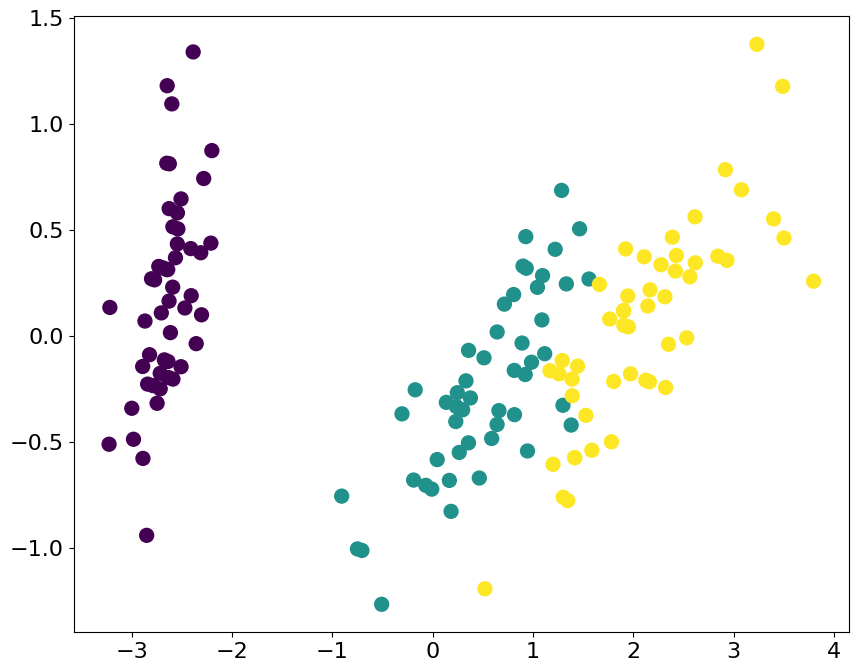

In [3]:
import matplotlib.pyplot as plt

def plot_pca(x_std, y):
    plt.figure(figsize=(10, 8))
    plt.scatter(x_std[:, 0], x_std[:, 1], c=y, s=100)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.show()
    
plot_pca(x_reduction, y)

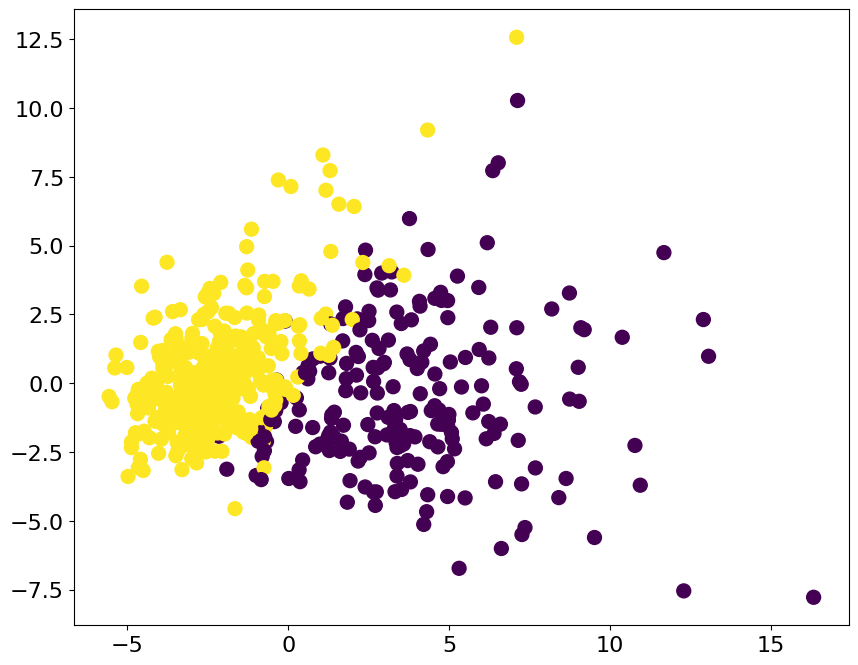

In [4]:
from sklearn.preprocessing import StandardScaler

cancer = datasets.load_breast_cancer()
x = cancer.data
y = cancer.target
x_std = StandardScaler().fit_transform(x)
pca = PCA(n_components=2)
pca.fit(x_std)
x_reduction = pca.transform(x_std)
plot_pca(x_reduction, y)

In [5]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_reduction, y, random_state=42)
print(x_train.shape)
print(x_test.shape)

(426, 2)
(143, 2)


In [6]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
print(log_reg.score(x_train, y_train))
print(log_reg.score(x_test, y_test))

0.9460093896713615
0.9790209790209791


In [7]:
print(pca.explained_variance_ratio_)

[0.44272026 0.18971182]


In [13]:
pca = PCA(n_components=x_std.shape[1])
pca.fit(x_std)
print(pca.n_components)
print(pca.explained_variance_ratio_.shape)


30
(30,)


In [14]:
print(pca.explained_variance_ratio_)

[4.42720256e-01 1.89711820e-01 9.39316326e-02 6.60213492e-02
 5.49576849e-02 4.02452204e-02 2.25073371e-02 1.58872380e-02
 1.38964937e-02 1.16897819e-02 9.79718988e-03 8.70537901e-03
 8.04524987e-03 5.23365745e-03 3.13783217e-03 2.66209337e-03
 1.97996793e-03 1.75395945e-03 1.64925306e-03 1.03864675e-03
 9.99096464e-04 9.14646751e-04 8.11361259e-04 6.01833567e-04
 5.16042379e-04 2.72587995e-04 2.30015463e-04 5.29779290e-05
 2.49601032e-05 4.43482743e-06]


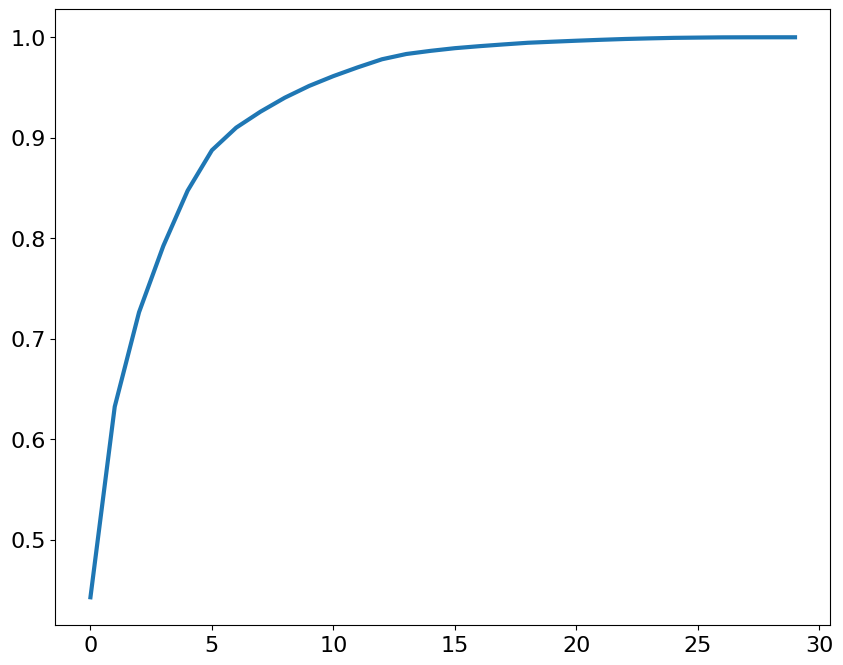

In [10]:
import numpy as np

plt.figure(figsize=(10, 8))
plt.plot([i for i in range(x_std.shape[1])], 
         [np.sum(pca.explained_variance_ratio_[:i+1]) for i in range(x_std.shape[1])], 
         linewidth=3)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

In [15]:
pca = PCA(0.95)
pca.fit(x_std)
print(pca.n_components_)

10


In [16]:
x_reduction = pca.transform(x_std)
x_train, x_test, y_train, y_test = train_test_split(x_reduction, y, random_state=42)
print(x_train.shape)
print(x_test.shape)

(426, 10)
(143, 10)


In [17]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
print(log_reg.score(x_train, y_train))
print(log_reg.score(x_test, y_test))

0.9882629107981221
0.9790209790209791


In [18]:
pca = PCA(n_components=2)
pca.fit(x_std)
x_reduction = pca.transform(x_std)
log_reg = LogisticRegression()
log_reg.fit(x_reduction, y)

print(log_reg.coef_)
print(log_reg.intercept_)

[[-2.02595675  1.11691791]]
[0.42874293]


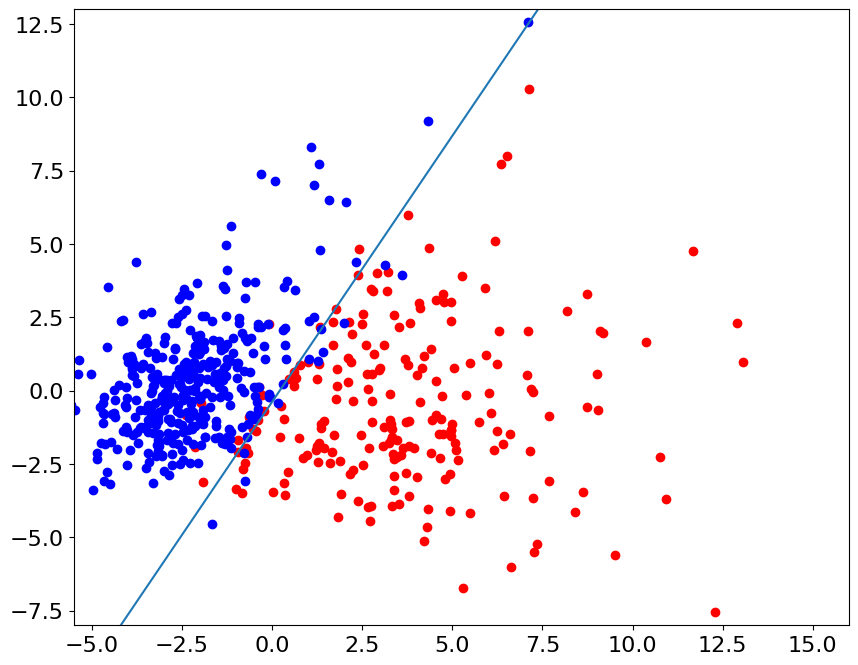

In [37]:
def x2(x1):
    return (-log_reg.coef_[0][0] * x1 - log_reg.intercept_) / log_reg.coef_[0][1]

x1_plot = np.linspace(-5, 15, 1000)
x2_plot = x2(x1_plot)

plt.figure(figsize=(10, 8))
plt.scatter(x_reduction[y==0, 0], x_reduction[y==0, 1], color='red')
plt.scatter(x_reduction[y==1, 0], x_reduction[y==1, 1], color='blue')
plt.plot(x1_plot, x2_plot)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlim(-5.5, 16)  
plt.ylim(-8, 13) 
plt.show()

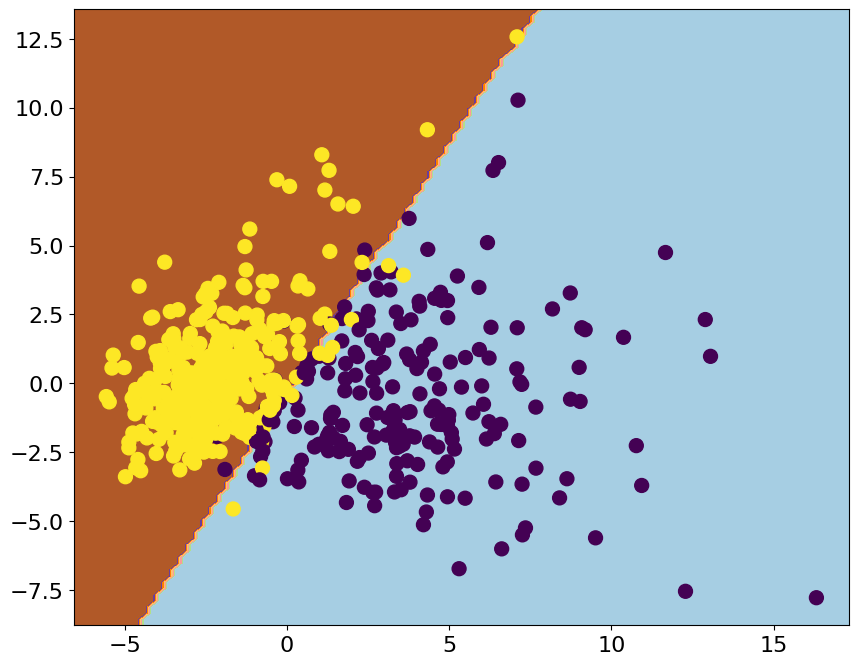

In [ ]:
from sklearn.inspection import DecisionBoundaryDisplay

plt.figure(figsize=(10, 8))
DecisionBoundaryDisplay.from_estimator(
    log_reg, x_reduction, cmap=plt.cm.Paired, response_method="predict", ax=plt.gca()
)
plt.scatter(x_reduction[:, 0], x_reduction[:, 1], c=y, s=100)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()